In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

/tmp/ipykernel_204352/2445996715.py:5: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [17]:
#usgs = gpd.read_file('USGS-concat.csv', index_col=0)
usgs = pd.read_csv('USGS-concat.csv', index_col=0)
mihevc = pd.read_csv('Mihevc-concat.csv', index_col=0)
combined = pd.read_csv('Combined-concat.csv', index_col=0)


In [24]:
usgs['log_p_karst'] = np.log10(usgs.p_karst)
mihevc['log_p_karst'] = np.log10(mihevc.p_karst)
combined['log_p_karst'] = np.log10(combined.p_karst)

usgs.log_p_karst.replace([np.inf, -np.inf], np.nan, inplace=True)
mihevc.log_p_karst.replace([np.inf, -np.inf], np.nan, inplace=True)
combined.log_p_karst.replace([np.inf, -np.inf], np.nan, inplace=True)

/home/mcoving/anaconda3/envs/geo_env/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mcoving/anaconda3/envs/geo_env/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


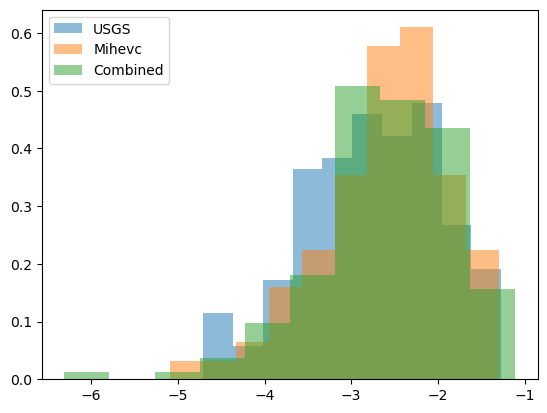

In [34]:
plt.hist(usgs.log_p_karst, alpha=0.5, label='USGS', density=True)
plt.hist(mihevc.log_p_karst, alpha=0.5, label='Mihevc', density=True)
plt.hist(combined.log_p_karst, alpha=0.5, label='Combined', density=True)
plt.legend()
